Getting Started with Python's NLTK

In [25]:
import nltk
import ssl
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


TOKENIZING

In [26]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
example_string = """
... Muad'Dib learned rapidly because his first training was in how to learn.
... And the first lesson of all was the basic trust that he could learn.
... It's shocking to find how many people do not believe they can learn,
... and how many more believe learning to be difficult."""
#seperate string into sentences. returns a list or array of sentences
sent_tokenize(example_string)



["\n... Muad'Dib learned rapidly because his first training was in how to learn.",
 '... And the first lesson of all was the basic trust that he could learn.',
 '...',
 "It's shocking to find how many people do not believe they can learn,\n... and how many more believe learning to be difficult."]

In [27]:
#seperate words in the string. returns a list or array of words.
#notice it's was broken into two words it and 's emphasizing it is
#notice Muad'Dib was not broken because it is not a possessive apostrophe
word_tokenize(example_string)

['...',
 "Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn',
 '.',
 '...',
 'And',
 'the',
 'first',
 'lesson',
 'of',
 'all',
 'was',
 'the',
 'basic',
 'trust',
 'that',
 'he',
 'could',
 'learn',
 '.',
 '...',
 'It',
 "'s",
 'shocking',
 'to',
 'find',
 'how',
 'many',
 'people',
 'do',
 'not',
 'believe',
 'they',
 'can',
 'learn',
 ',',
 '...',
 'and',
 'how',
 'many',
 'more',
 'believe',
 'learning',
 'to',
 'be',
 'difficult',
 '.']

In [28]:
# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bajibero/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
worf_quote = "Sir, I protest. I am not a merry man!"
words_inquote = word_tokenize(worf_quote)
words_inquote

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

In [30]:
#filtered out stop words such as am, i, in, a. Words that will not affect the overall meaning of the sentence
stop_words = set(stopwords.words("english"))
filtered_list = []
for word in words_inquote:
    if word.casefold() not in stop_words:
        filtered_list.append(word)

filtered_list

['Sir', ',', 'protest', '.', 'merry', 'man', '!']

STEMMING

In [31]:

stemmer = PorterStemmer()
string_for_stemming = "The crew of the USS Discovery discovered many discoveries. Discovering is what explorers do."
words_to_stem = word_tokenize(string_for_stemming)
words_to_stem

['The',
 'crew',
 'of',
 'the',
 'USS',
 'Discovery',
 'discovered',
 'many',
 'discoveries',
 '.',
 'Discovering',
 'is',
 'what',
 'explorers',
 'do',
 '.']

In [32]:
stemmed_words = [stemmer.stem(word) for word in words_to_stem]
stemmed_words
#todo: explore Porter2 - Snowbal stemmer

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

Tagging Parts of Speech

In [33]:
#words are broken down into tuples by parts of speech (word, pos_tag). kind of like a parser
nltk.download('averaged_perceptron_tagger_eng')
sagan_quote = """
 If you wish to make an apple pie from scratch,
 you must first invent the universe."""
words_in_sagan_quote = word_tokenize(sagan_quote)
nltk.pos_tag(words_in_sagan_quote)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/bajibero/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('If', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]

In [34]:
nltk.download('tagsets_json')
nltk.help.upenn_tagset() #for parts of speech tags and their meanings

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets_json to
[nltk_data]     /Users/bajibero/nltk_data...
[nltk_data]   Package tagsets_json is already up-to-date!


In [35]:
jabberwocky_excerpt = """'Twas brillig, and the slithy toves did gyre and gimble in the wabe:
all mimsy were the borogoves, and the mome raths outgrabe."""
words_in_excerpt = word_tokenize(jabberwocky_excerpt)
nltk.pos_tag(words_in_excerpt)

[("'T", 'NN'),
 ('was', 'VBD'),
 ('brillig', 'VBN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('slithy', 'JJ'),
 ('toves', 'NNS'),
 ('did', 'VBD'),
 ('gyre', 'NN'),
 ('and', 'CC'),
 ('gimble', 'JJ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('wabe', 'NN'),
 (':', ':'),
 ('all', 'DT'),
 ('mimsy', 'NNS'),
 ('were', 'VBD'),
 ('the', 'DT'),
 ('borogoves', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('mome', 'JJ'),
 ('raths', 'NNS'),
 ('outgrabe', 'RB'),
 ('.', '.')]

Lemmatizing

In [36]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("scarves")


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bajibero/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'scarf'

In [37]:
string_for_lemmatizing = "The friends of DeSoto love scarves."
words = word_tokenize(string_for_lemmatizing)
words
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
lemmatized_words

['The', 'friend', 'of', 'DeSoto', 'love', 'scarf', '.']

In [38]:
lemmatizer.lemmatize("better", pos="a")


'good'

CHUNKING

In [39]:
lotr_quote = "It's a dangerous business, Frodo, going out your door."
words_in_lotr_quote = word_tokenize(lotr_quote)
words_in_lotr_quote
lotr_pos_tags = nltk.pos_tag(words_in_lotr_quote)
lotr_pos_tags
#chunk grammar sample. uses regex. DT stands for determiner | JJ for adjective || NN for Noun
grammar = "NP: {<DT>?<JJ>*<NN>}"
chunk_parser = nltk.RegexpParser(grammar)
tree = chunk_parser.parse(lotr_pos_tags)
tree.draw()

CHINKING

In [40]:
grammar = "Chunk: {<.*>+}}<JJ>{"
tree2 = chunk_parser.parse(lotr_pos_tags)
tree2
tree2.draw()

Using Named Entity Recognition

In [41]:
nltk.download("maxent_ne_chunker_tab")
nltk.download("words")
tree3 = nltk.ne_chunk(lotr_pos_tags)
tree.draw()

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/bajibero/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /Users/bajibero/nltk_data...
[nltk_data]   Package words is already up-to-date!


ModuleNotFoundError: No module named 'numpy'

In [88]:
tree = nltk.ne_chunk(lotr_pos_tags, binary=True)
tree.draw()

In [91]:
quote = """
Men like Schiaparelli watched the red planet—it is odd, by-the-bye, that
for countless centuries Mars has been the star of war—but failed to
interpret the fluctuating appearances of the markings they mapped so well.
All that time the Martians must have been getting ready.

During the opposition of 1894 a great light was seen on the illuminated
part of the disk, first at the Lick Observatory, then by Perrotin of Nice,
and then by other observers. English readers heard of it first in the
issue of Nature dated August 2."""

def extract_ne(quote):
    words = word_tokenize(quote, language="english")
    tags = nltk.pos_tag(words)
    tree = nltk.ne_chunk(tags, binary=True)
    return set(" ".join(i[0] for i in t)
       for t in tree
       if hasattr(t, "label") and t.label() == "NE"
       )
extract_ne(quote)

{'Lick Observatory', 'Mars', 'Nature', 'Perrotin', 'Schiaparelli'}

Getting Text to Analyze

In [94]:
nltk.download("book")
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/bajibero/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/bajibero/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/bajibero/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/bajibero/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/bajibero/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/bajibero/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank t

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [95]:
#concordance displays each time a word is used, along with its immediate context
text8.concordance("man")

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

In [96]:
text8.concordance("woman")

Displaying 11 of 11 matches:
at home . Seeking an honest , caring woman , slim or med . build , who enjoys t
thy man 37 like to meet full figured woman for relationship . 48 slim , shy , S
rry . MALE 58 years old . Is there a Woman who would like to spend 1 weekend a 
 other interests . Seeking Christian Woman for fship , view to rship . SWM 45 D
ALE 60 - burly beared seeks intimate woman for outings n / s s / d F / ston / P
ington . SCORPIO 47 seeks passionate woman for discreet intimate encounters SEX
le dad . 42 , East sub . 5 " 9 seeks woman 30 + for f / ship relationship TALL 
personal trainer looking for married woman age open for fun MARRIED Dark guy 37
rinker , seeking slim - medium build woman who is happy in life , age open . AC
. O . TERTIARY Educated professional woman , seeks professional , employed man 
 real romantic , age 50 - 65 y . o . WOMAN OF SUBSTANCE 56 , 59 kg ., 50 , fit 


Making a Dispersion Plot

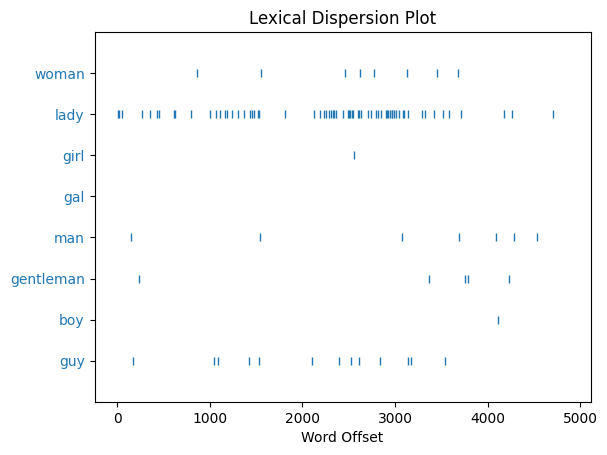

In [97]:
text8.dispersion_plot(["woman", "lady", "girl", "gal", "man", "gentleman", "boy", "guy"])

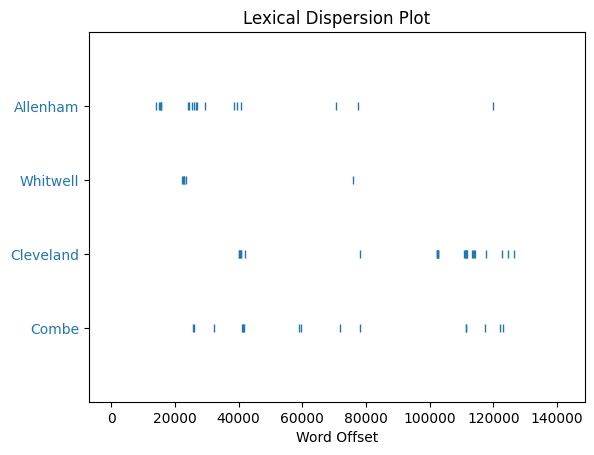

In [98]:
text2.dispersion_plot(["Allenham", "Whitwell", "Cleveland", "Combe"])

Making a Frequency Distribution

In [99]:
frequency_distribution = FreqDist(text8)
print(frequency_distribution)

<FreqDist with 1108 samples and 4867 outcomes>


In [100]:
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('for', 99),
 ('and', 74),
 ('to', 74),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('a', 52),
 ('with', 44),
 ('S', 36),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('in', 27),
 ('slim', 27),
 ('build', 27),
 ('o', 26)]

In [103]:
meaningful_words = [word for word in text8 if word.casefold() not in stop_words]
frequency_distribution = FreqDist(meaningful_words)
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('slim', 27),
 ('build', 27),
 ('smoker', 23),
 ('50', 23),
 ('non', 22),
 ('movies', 22),
 ('good', 21),
 ('honest', 20),
 ('dining', 19),
 ('rship', 18)]

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

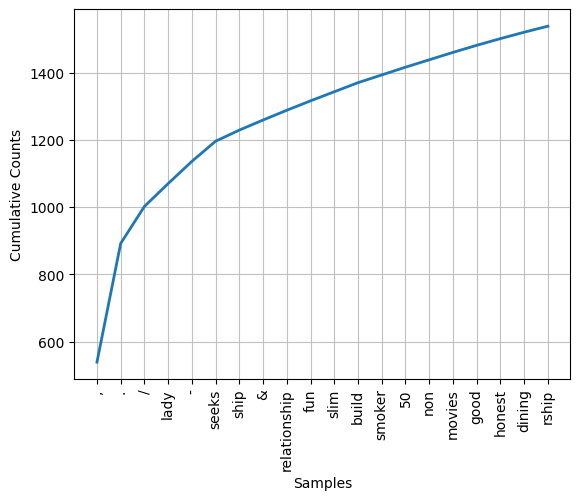

In [104]:
frequency_distribution.plot(20, cumulative=True)

Finding Collocations

In [105]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in text8]
new_text = nltk.Text(lemmatized_words)
new_text.collocations()

medium build; social drinker; non smoker; quiet night; long term;
would like; age open; easy going; financially secure; Would like; fun
time; similar interest; Age open; poss rship; weekend away; well
presented; never married; single mum; permanent relationship; year old
